# Trabalhando com GEOPANDAS

In [ ]:
from IPython.display import HTML
shell = get_ipython()

def adjust_font_size():
    display(HTML('''<style>
    body {
        font-size: 18px;
    }
    </style>'''))

if adjust_font_size not in shell.events.callbacks['pre_execute']:
    shell.events.register('pre_execute', adjust_font_size)

In [ ]:
import geopandas as gpd

In [ ]:
import os
import matplotlib

In [ ]:
# pip install matplotlib

In [ ]:
# Verifique o diretório atual
print("Diretório atual:", os.getcwd())

# Construa o caminho completo para o arquivo
path = os.path.join(os.getcwd(), '/content/drive/MyDrive/GIS/municipios.shp')

# Verifique se o arquivo existe
if os.path.exists(path):
    print("Arquivo encontrado:", path)
else:
    print("Arquivo não encontrado:", path)

Diretório atual: /content
Arquivo encontrado: /content/drive/MyDrive/GIS/municipios.shp


In [ ]:
data = gpd.read_file(path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Axes: >

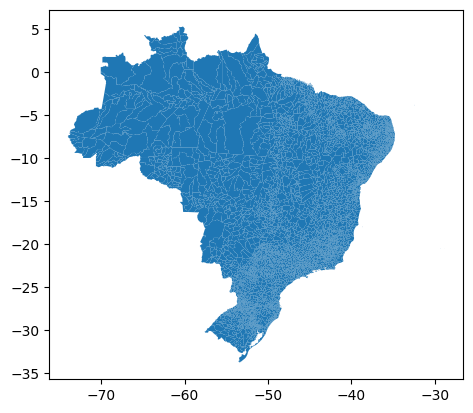

In [ ]:
data.plot()

In [ ]:
type(data)

geopandas.geodataframe.GeoDataFrame

In [ ]:
data.head()

,id,id_pk,geocodigo,municipio,uf,regiao,area,geometry
0,1,1,5100102,Acorizal,MT,Centro-Oeste,None,"POLYGON ((-56.28986 -15.23886, -56.28991 -15.2..."
1,2,104,5107156,Reserva Do Cabaçal,MT,Centro-Oeste,None,"POLYGON ((-58.50758 -15.00500, -58.72273 -15.0..."
2,3,144,5200100,Abadiânia,GO,Centro-Oeste,None,"POLYGON ((-48.91412 -16.08702, -48.91283 -16.0..."
3,4,147,5200175,Água Fria De Goiás,GO,Centro-Oeste,None,"POLYGON ((-47.85740 -14.76522, -47.85657 -14.7..."
4,5,160,5201306,Anicuns,GO,Centro-Oeste,None,"POLYGON ((-49.98332 -16.32660, -49.98259 -16.3..."


In [ ]:
data.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
filtro = data[:10]
print(filtro)

   id  id_pk geocodigo               municipio  uf        regiao  area  \
0   1      1   5100102                Acorizal  MT  Centro-Oeste  None   
1   2    104   5107156      Reserva Do Cabaçal  MT  Centro-Oeste  None   
2   3    144   5200100               Abadiânia  GO  Centro-Oeste  None   
3   4    147   5200175      Água Fria De Goiás  GO  Centro-Oeste  None   
4   5    160   5201306                 Anicuns  GO  Centro-Oeste  None   
5   6    157   5200902            Amorinópolis  GO  Centro-Oeste  None   
6   7    357   5219803            São Domingos  GO  Centro-Oeste  None   
7   8    358   5219902  São Francisco De Goiás  GO  Centro-Oeste  None   
8   9    163   5201504                   Aporé  GO  Centro-Oeste  None   
9  10    172   5203104                  Baliza  GO  Centro-Oeste  None   

                                            geometry  
0  POLYGON ((-56.28986 -15.23886, -56.28991 -15.2...  
1  POLYGON ((-58.50758 -15.00500, -58.72273 -15.0...  
2  POLYGON ((-48.914

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path_out = '/content/drive/MyDrive/GIS/municipios_filter.shp'
filtro.to_file(path_out)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_filter = gpd.read_file(path_out)

<Axes: >

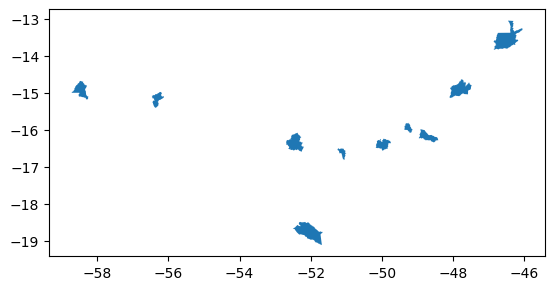

In [ ]:
data_filter.plot()

## loc e iloc

In [ ]:
data.loc[2,:]

id                                                           3
id_pk                                                      144
geocodigo                                              5200100
municipio                                            Abadiânia
uf                                                          GO
regiao                                            Centro-Oeste
area                                                      None
geometry     POLYGON ((-48.91412123317579 -16.0870191010398...
Name: 2, dtype: object

In [ ]:
filtro_bol = data["id"] > 6125
data.loc[filtro_bol]

,id,id_pk,geocodigo,municipio,uf,regiao,area,geometry
6125,6126,6121,4128500,Wenceslau Braz,PR,Sul,None,"POLYGON ((-49.79156 -23.73905, -49.79150 -23.7..."
6126,6127,6123,4128559,Vera Cruz Do Oeste,PR,Sul,None,"POLYGON ((-53.87662 -24.99329, -53.87627 -24.9..."
6127,6128,6125,4128625,Alto Paraíso,PR,Sul,None,"POLYGON ((-53.79019 -23.37994, -53.78410 -23.3..."
6128,6129,6128,4128708,Vitorino,PR,Sul,None,"POLYGON ((-52.86974 -26.22005, -52.86972 -26.2..."


In [ ]:
# and &
# or |
# filtro_bo1 = data['id']>6125
filtro_bo1 = (data['id']>6125) & (data['geocodigo']=='4128708')
data.loc[filtro_bo1]

,id,id_pk,geocodigo,municipio,uf,regiao,area,geometry
6128,6129,6128,4128708,Vitorino,PR,Sul,None,"POLYGON ((-52.86974 -26.22005, -52.86972 -26.2..."


In [ ]:
# iloc
# data.loc[:, 'area']
data['municipio'] = 'Isso é um teste'

In [ ]:
data

,id,id_pk,geocodigo,municipio,uf,regiao,area,geometry
0,1,1,5100102,Isso é um teste,MT,Centro-Oeste,None,"POLYGON ((-56.28986 -15.23886, -56.28991 -15.2..."
1,2,104,5107156,Isso é um teste,MT,Centro-Oeste,None,"POLYGON ((-58.50758 -15.00500, -58.72273 -15.0..."
2,3,144,5200100,Isso é um teste,GO,Centro-Oeste,None,"POLYGON ((-48.91412 -16.08702, -48.91283 -16.0..."
3,4,147,5200175,Isso é um teste,GO,Centro-Oeste,None,"POLYGON ((-47.85740 -14.76522, -47.85657 -14.7..."
4,5,160,5201306,Isso é um teste,GO,Centro-Oeste,None,"POLYGON ((-49.98332 -16.32660, -49.98259 -16.3..."
...,...,...,...,...,...,...,...,...
6124,6125,6120,4128401,Isso é um teste,PR,Sul,None,"POLYGON ((-50.89000 -23.14711, -50.87139 -23.1..."
6125,6126,6121,4128500,Isso é um teste,PR,Sul,None,"POLYGON ((-49.79156 -23.73905, -49.79150 -23.7..."
6126,6127,6123,4128559,Isso é um teste,PR,Sul,None,"POLYGON ((-53.87662 -24.99329, -53.87627 -24.9..."
6127,6128,6125,4128625,Isso é um teste,PR,Sul,None,"POLYGON ((-53.79019 -23.37994, -53.78410 -23.3..."
